In [1]:
import numpy as np
import osmnx as ox
import networkx as nx
import sys
sys.path.append("./scripts")
import simplify_vertices as sv
import eulerian_path as ep

## Parcours du drone

### Simulation sur une petite zone d'un arrondissement

In [2]:
G2 = [(2187161104, 301495983, 42.542), (2187161104, 2187161105, 37.878), (2187161104, 2187161117, 67.978), (2187161104, 2187161118, 101.438), (301495983, 615017544, 66.387), (301495983, 615017546, 73.866), (301495983, 2187162903, 40.899), (2187161105, 2187161113, 34.982), (2187161105, 2187161106, 121.617), (2187161117, 615017544, 40.396), (2187161117, 371474024, 69.239), (2187161118, 2187161106, 44.747), (2187161118, 371474024, 73.995), (2187161118, 615001828, 38.42), (2187161113, 2187161109, 140.759), (2187161113, 615017546, 41.433), (2187161106, 2187161109, 37.106), (2187161109, 615001834, 37.605), (615001834, 615001828, 84.301), (615001834, 615001836, 122.592), (615017546, 2187162922, 40.279), (615017544, 615017532, 74.543), (615017544, 2187162910, 40.654), (371474024, 615001826, 38.812), (615001828, 615001826, 77.42), (615001828, 615001830, 15.593), (615017532, 248511702, 71.909), (615017532, 2188531350, 72.924), (615017532, 2187162915, 41.737), (248511702, 2188531370, 32.518), (248511702, 2187162887, 41.736), (2188531350, 2188531370, 85.13), (2188531350, 615001807, 39.419), (2187162915, 2187162880, 41.084), (2187162915, 2187162900, 247.958), (2187162915, 2187162918, 36.514), (615017534, 2188531388, 35.57), (615017534, 2189049774, 34.301), (615017534, 615017535, 77.436), (2188531388, 2188531373, 38.236), (2188531388, 2188531381, 38.503), (2188531388, 2188531396, 119.103), (2189049774, 2189049736, 113.266), (2189049774, 2189049737, 37.578), (615017535, 2189049755, 34.145), (615017535, 2188531375, 37.001), (615017535, 615017537, 71.644), (2189049755, 2189049737, 40.629), (2189049755, 2189049740, 5.584), (2188531375, 2187162920, 4.948), (2188531375, 2188531381, 38.693), (615017537, 2187162900, 42.729), (615017537, 2189049760, 39.307), (615017537, 615017543, 70.628), (2187162900, 2187162890, 37.378), (2187162900, 2187162898, 38.86), (2189049760, 2189049759, 248.819), (2189049760, 2189049777, 36.955), (2189049760, 2189049765, 36.575), (615017543, 615017538, 67.255), (615017543, 2189049757, 38.899), (615017543, 2187162905, 43.081), (615017538, 2187162893, 39.867), (615017538, 2189049739, 41.996), (2187162893, 2187162903, 247.85699999999997), (2187162893, 2187162912, 35.006), (2189049739, 2189049754, 34.856), (2189049757, 2189049754, 32.723), (2189049757, 2189049763, 249.076), (2189049757, 2189049765, 33.25), (2187162905, 2187162898, 31.656), (2187162905, 2187162912, 32.537), (2187162905, 2187162910, 248.53), (2187162910, 2187162880, 32.431), (2187162910, 2187162885, 33.797), (2187162922, 2187162903, 74.343), (615017584, 2189049736, 180.975), (615017584, 615017585, 84.696), (2140361825, 615001811, 228.54), (2140361825, 615001830, 10.936), (615001811, 9256960176, 7.414), (615001811, 615001817, 15.746), (615001826, 615001807, 79.669), (2189049736, 2189049764, 39.572), (615017585, 615017586, 70.446), (615017585, 2189049771, 40.821), (615017586, 615017587, 64.125), (615017586, 2189049759, 40.295), (2189049771, 2189049732, 35.021), (2189049771, 2189049764, 181.114), (2189049771, 2189049768, 136.215), (615017587, 2189049763, 40.334), (2189049759, 2189049732, 35.578), (2189049759, 2189049742, 34.047), (2189049763, 2189049742, 30.881), (2189049763, 2189049761, 35.082), (2188531370, 9306783005, 4.733), (2188531370, 615001817, 41.681000000000004), (615001807, 615001817, 83.134), (2188531362, 2187162887, 127.62), (2188531362, 2187162920, 121.265), (2188531362, 2188531384, 37.449), (2187162887, 2187162918, 35.579), (2187162887, 9306783005, 76.72800000000001), (2187162920, 2187162890, 34.32), (2188531384, 2188531381, 126.342), (2188531384, 2188531392, 184.89), (2188531384, 2188531394, 38.902), (2188531373, 2188531386, 118.978), (9306783005, 9256960177, 41.67200000000001), (9306783005, 2188531392, 33.845), (615001817, 9256960177, 7.531), (2188531386, 2188531396, 38.422), (9256960176, 9256960177, 15.667), (9256960177, 615001803, 75.58300000000001), (615001803, 1764326134, 41.367000000000004), (2187162903, 2187162885, 33.131), (1764326134, 2188531392, 43.505), (1764326134, 2188531394, 166.316), (2188531394, 2188531396, 7.358), (615001836, 615001851, 75.47500000000001), (2187162880, 2187162898, 248.257), (2187162885, 2187162912, 248.182), (2187162918, 2187162890, 248.475), (2189049732, 2189049777, 248.402), (2189049777, 2189049740, 34.534), (2189049764, 2189049737, 115.259), (2189049764, 2189049768, 41.31), (2189049754, 2189049761, 249.049), (2189049740, 2189049768, 111.751), (2189049742, 2189049765, 248.955)]
l = sv.extract_vertices(G2)

G = sv.replace_vertices(G2, l)
print(G)

[(0, 1, 42.542), (0, 2, 37.878), (0, 3, 67.978), (0, 4, 101.438), (1, 5, 66.387), (1, 6, 73.866), (1, 7, 40.899), (2, 8, 34.982), (2, 9, 121.617), (3, 5, 40.396), (3, 10, 69.239), (4, 9, 44.747), (4, 10, 73.995), (4, 11, 38.42), (8, 12, 140.759), (8, 6, 41.433), (9, 12, 37.106), (12, 13, 37.605), (13, 11, 84.301), (13, 14, 122.592), (6, 15, 40.279), (5, 16, 74.543), (5, 17, 40.654), (10, 18, 38.812), (11, 18, 77.42), (11, 19, 15.593), (16, 20, 71.909), (16, 21, 72.924), (16, 22, 41.737), (20, 23, 32.518), (20, 24, 41.736), (21, 23, 85.13), (21, 25, 39.419), (22, 26, 41.084), (22, 27, 247.958), (22, 28, 36.514), (29, 30, 35.57), (29, 31, 34.301), (29, 32, 77.436), (30, 33, 38.236), (30, 34, 38.503), (30, 35, 119.103), (31, 36, 113.266), (31, 37, 37.578), (32, 38, 34.145), (32, 39, 37.001), (32, 40, 71.644), (38, 37, 40.629), (38, 41, 5.584), (39, 42, 4.948), (39, 34, 38.693), (40, 27, 42.729), (40, 43, 39.307), (40, 44, 70.628), (27, 45, 37.378), (27, 46, 38.86), (43, 47, 248.819), (43,

In [3]:
path = ep.convert_and_find_eulerian_path(len(l), G)
print("Chemin avec noeuds simplifiés:", path, '\n')
path = sv.replace_vertices_back_in_path(path, l)
print("Chemin final:", path)

[82, 14, 13, 18, 11, 13, 12, 9, 4, 10, 3, 10, 18, 25, 21, 25, 64, 79, 63, 62, 81, 76, 73, 24, 28, 26, 46, 55, 58, 6, 15, 7, 58, 17, 26, 22, 28, 45, 42, 45, 27, 40, 43, 48, 41, 70, 65, 67, 70, 36, 65, 37, 38, 41, 48, 69, 71, 49, 56, 72, 57, 71, 47, 69, 67, 60, 66, 47, 43, 49, 51, 56, 54, 50, 53, 55, 52, 17, 5, 3, 0, 4, 11, 19, 61, 62, 64, 23, 73, 79, 80, 81, 77, 35, 77, 75, 34, 39, 42, 74, 75, 76, 20, 23, 21, 16, 22, 27, 46, 52, 44, 51, 57, 68, 66, 60, 59, 36, 31, 29, 31, 37, 38, 32, 39, 34, 30, 35, 78, 33, 30, 29, 32, 40, 44, 50, 53, 7, 1, 6, 8, 2, 9, 12, 8, 2, 0, 1, 5, 16, 20, 24, 74] 

[615001851, 615001836, 615001834, 615001826, 615001828, 615001834, 2187161109, 2187161106, 2187161118, 371474024, 2187161117, 371474024, 615001826, 615001807, 2188531350, 615001807, 615001817, 9256960177, 9256960176, 615001811, 1764326134, 2188531392, 9306783005, 2187162887, 2187162918, 2187162880, 2187162898, 2187162912, 2187162885, 615017546, 2187162922, 2187162903, 2187162885, 2187162910, 2187162880

### Application sur les 19 arrondissements

In [4]:
G_1 = ox.load_graphml('data/graph.graphml')
G_2 = ox.load_graphml('data/graph2.graphml')
G_3 = ox.load_graphml('data/graph3.graphml')
G_4 = ox.load_graphml('data/graph4.graphml')
G_5 = ox.load_graphml('data/graph5.graphml')
G_6 = ox.load_graphml('data/graph6.graphml')
G_7 = ox.load_graphml('data/graph7.graphml')
G_8 = ox.load_graphml('data/graph8.graphml')
G_9 = ox.load_graphml('data/graph9.graphml')
G_10 = ox.load_graphml('data/graph10.graphml')
G_11 = ox.load_graphml('data/graph11.graphml')
G_12 = ox.load_graphml('data/graph12.graphml')
G_13 = ox.load_graphml('data/graph13.graphml')
G_14 = ox.load_graphml('data/graph14.graphml')
G_15 = ox.load_graphml('data/graph15.graphml')
G_16 = ox.load_graphml('data/graph16.graphml')
G_17 = ox.load_graphml('data/graph17.graphml')
G_18 = ox.load_graphml('data/graph18.graphml')
G_19 = ox.load_graphml('data/graph19.graphml')

L = [G_1, G_2, G_3, G_4, G_5, G_6, G_7, G_8, G_9, G_10, G_11, G_12, G_13, G_14, G_15, G_16, G_17, G_18, G_19]

In [5]:
def decomplexify_tograph(graph):
    node_list = graph.edges(data=True)
    to_graph = []
    for node in node_list:
        #Weight
        dist = node[2]["length"]
        n1 = node[0]
        n2 = node[1]
        to_graph.append((n1, n2, dist))
    return to_graph

In [6]:
for i in range(len(L)):
    L[i] = decomplexify_tograph(L[i])

In [7]:
paths = []

for i in range(len(L)):
    print("Processing on district n°%d of Montréal" % (i + 1))
    vertices = sv.extract_vertices(L[i])
    graph = sv.replace_vertices(L[i], vertices)
    path = ep.convert_and_find_eulerian_path(len(vertices), graph)
    final_path = sv.replace_vertices_back_in_path(path, vertices)
    paths.append(final_path)
    print("Path found!", '\n')

Processing on district n°1 of Montréal
Path found! 

Processing on district n°2 of Montréal
Path found! 

Processing on district n°3 of Montréal
Path found! 

Processing on district n°4 of Montréal
Path found! 

Processing on district n°5 of Montréal
Path found! 

Processing on district n°6 of Montréal
Path found! 

Processing on district n°7 of Montréal
Path found! 

Processing on district n°8 of Montréal
Path found! 

Processing on district n°9 of Montréal
Path found! 

Processing on district n°10 of Montréal
Path found! 

Processing on district n°11 of Montréal
Path found! 

Processing on district n°12 of Montréal
Path found! 

Processing on district n°13 of Montréal
Path found! 

Processing on district n°14 of Montréal
Path found! 

Processing on district n°15 of Montréal
Path found! 

Processing on district n°16 of Montréal
Path found! 

Processing on district n°17 of Montréal
Path found! 

Processing on district n°18 of Montréal
Path found! 

Processing on district n°19 of Montré

On peut voir sur l'image ci-dessous que le 1er chemin recouvre bien l'entièreté du 1er arrondissement de la ville.

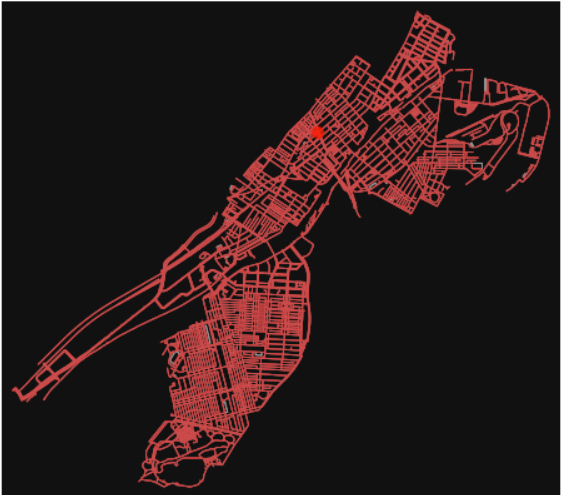

## Trouver le chemin le plus court pour passer d'un arrondissment à l'autre